# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [7]:
pd.options.display.float_format = '{:,.10f}'.format

In [4]:
!pip install openpyxl

You should consider upgrading via the 'C:\Users\yasir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# Ingest Data  

In [69]:
df = pd.read_excel("World military power.xlsx", header=[1])
df.head(20)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444000000,Afghanistan,260.0000000000,Afghanistan,0.0000000000,Afghanistan,25.0000000000,Afghanistan,30.0000000000,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0000000000,Afghanistan,"1,200.0000000000",Afghanistan,"5,987.0000000000"
1,Albania,2.3137000000,Albania,19.0000000000,Albania,0.0000000000,Albania,0.0000000000,Albania,0.0000000000,...,Albania,"30,57,220",Albania,"28,748.0000000000",Albania,362.0000000000,Albania,41.0000000000,Albania,691.0000000000
2,Algeria,0.4659000000,Algeria,551.0000000000,Algeria,103.0000000000,Algeria,22.0000000000,Algeria,59.0000000000,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0000000000,Algeria,0.0000000000,Algeria,"6,734.0000000000"
3,Angola,0.8379000000,Angola,295.0000000000,Angola,72.0000000000,Angola,18.0000000000,Angola,30.0000000000,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,"1,600.0000000000",Angola,"1,300.0000000000",Angola,"5,369.0000000000"
4,Argentina,0.6521000000,Argentina,227.0000000000,Argentina,24.0000000000,Argentina,7.0000000000,Argentina,9.0000000000,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,"4,989.0000000000",Argentina,"11,000.0000000000",Argentina,"11,968.0000000000"
5,Armenia,2.1251000000,Armenia,64.0000000000,Armenia,0.0000000000,Armenia,9.0000000000,Armenia,3.0000000000,...,Armenia,"30,38,217",Armenia,"29,743.0000000000",NaN,NaN,Armenia,0.0000000000,Armenia,"1,570.0000000000"
6,Australia,0.3225000000,Australia,464.0000000000,Australia,82.0000000000,Australia,6.0000000000,Australia,38.0000000000,...,Australia,"2,34,70,145",Australia,"77,41,220",Australia,"25,760.0000000000",Australia,"2,000.0000000000",NaN,NaN
7,Austria,0.9568000000,Austria,120.0000000000,Austria,15.0000000000,Austria,0.0000000000,Austria,11.0000000000,...,Austria,"87,93,370",Austria,"83,871.0000000000",NaN,NaN,Austria,0.0000000000,Austria,"2,524.0000000000"
8,Azerbaijan,0.9463000000,Azerbaijan,147.0000000000,Azerbaijan,17.0000000000,Azerbaijan,12.0000000000,Azerbaijan,1.0000000000,...,Azerbaijan,"1,00,46,516",Azerbaijan,"86,600.0000000000",Azerbaijan,713.0000000000,Azerbaijan,0.0000000000,Azerbaijan,"2,468.0000000000"
9,Bahrain,1.8547000000,Bahrain,109.0000000000,Bahrain,17.0000000000,Bahrain,0.0000000000,Bahrain,2.0000000000,...,Bahrain,"14,22,659",Bahrain,760.0000000000,Bahrain,161.0000000000,Bahrain,0.0000000000,NaN,NaN


# EDA

In [27]:
df.isnull().sum().any()

True

In [31]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [73]:
new_columns = []
for i in list(df.columns) :
    if str.endswith(i,'value'):
     new_columns.append(i)
       
new_columns

['Aircraft Strength value',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength value',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength value',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'defense spending budget value',
 'External Debt value',
 'Airport Totals value',
 'Oil Production value',
 'Oil Consumption value',
 'Proven Oil Reserves value',
 'Available Manpower value',
 'Total Population value',
 'Total Square Land Area value',
 'Total Coastline Coverage value',
 'Total Waterway Coverage value',
 'Total Border Coverage value']

In [87]:
df.duplicated().sum()

0

In [121]:
df_p = df[['Military Strength','Military Strength Power Index']]
df_p.head()

,Military Strength,Military Strength Power Index
0,Afghanistan,1.3444000000
1,Albania,2.3137000000
2,Algeria,0.4659000000
3,Angola,0.8379000000
4,Argentina,0.6521000000


In [123]:
df_nodup = df[new_columns]
df_nodup.head().T

,0,1,2,3,4
Aircraft Strength value,260.0000000000,19.0000000000,551.0000000000,295.0000000000,227.0000000000
Fighter/Interceptor Strength value,0.0000000000,0.0000000000,103.0000000000,72.0000000000,24.0000000000
Attack Aircraft Strength value,25.0000000000,0.0000000000,22.0000000000,18.0000000000,7.0000000000
Transport Aircraft Fleet Strength value,30.0000000000,0.0000000000,59.0000000000,30.0000000000,9.0000000000
Trainer Aircraft Fleet value,0.0000000000,0.0000000000,87.0000000000,47.0000000000,64.0000000000
Helicopter Fleet Strength value,187.0000000000,19.0000000000,257.0000000000,126.0000000000,100.0000000000
Attack Helicopter Fleet Strength value,0.0000000000,0.0000000000,45.0000000000,15.0000000000,0.0000000000
Tank Strength value,0.0000000000,0.0000000000,880.0000000000,379.0000000000,370.0000000000
AFV/APC Strength value,"1,062.0000000000",467.0000000000,"7,361.0000000000",595.0000000000,739.0000000000
Self-Propelled Artillery Strength value,0.0000000000,0.0000000000,320.0000000000,28.0000000000,83.0000000000


In [124]:
data = pd.concat([df_p,df_nodup], axis=1)
data.head().T

,0,1,2,3,4
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Military Strength Power Index,1.3444000000,2.3137000000,0.4659000000,0.8379000000,0.6521000000
Aircraft Strength value,260.0000000000,19.0000000000,551.0000000000,295.0000000000,227.0000000000
Fighter/Interceptor Strength value,0.0000000000,0.0000000000,103.0000000000,72.0000000000,24.0000000000
Attack Aircraft Strength value,25.0000000000,0.0000000000,22.0000000000,18.0000000000,7.0000000000
Transport Aircraft Fleet Strength value,30.0000000000,0.0000000000,59.0000000000,30.0000000000,9.0000000000
Trainer Aircraft Fleet value,0.0000000000,0.0000000000,87.0000000000,47.0000000000,64.0000000000
Helicopter Fleet Strength value,187.0000000000,19.0000000000,257.0000000000,126.0000000000,100.0000000000
Attack Helicopter Fleet Strength value,0.0000000000,0.0000000000,45.0000000000,15.0000000000,0.0000000000
Tank Strength value,0.0000000000,0.0000000000,880.0000000000,379.0000000000,370.0000000000


In [125]:
data.isnull().sum().sort_values(ascending=False)


Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [115]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Aircraft Strength value                  138 non-null    float64
 2   Fighter/Interceptor Strength value       138 non-null    float64
 3   Attack Aircraft Strength value           138 non-null    float64
 4   Transport Aircraft Fleet Strength value  138 non-null    float64
 5   Trainer Aircraft Fleet value             138 non-null    float64
 6   Helicopter Fleet Strength value          138 non-null    float64
 7   Attack Helicopter Fleet Strength value   138 non-null    float64
 8   Tank Strength value                      138 non-null    float64
 9   AFV/APC Strength value                   138 non-null    float64
 10  Self-Propelled Artillery Strength value  138 non-n

<Figure size 288x432 with 0 Axes>

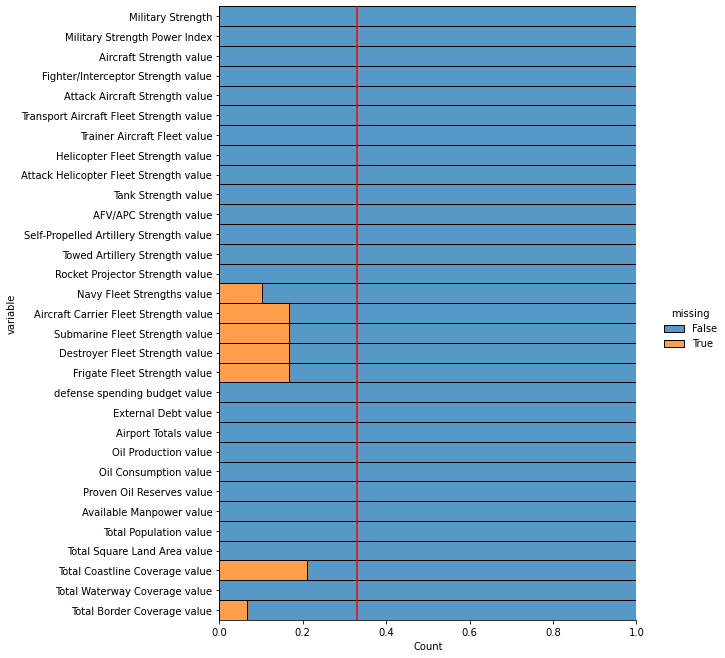

In [126]:
plt.figure(figsize=(4,6))

sns.displot(
    data=data.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.33, color="r");

## Implement basic steps to see how is your data looks like

## Convert multi index columns to one level

## Detect and drop duplicated columns

## Check for missing values 

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [165]:
data.loc[
    data['Aircraft Carrier Fleet Strength value'].isnull(),
     ['Navy Fleet Strengths value',
     'Aircraft Carrier Fleet Strength value',
     'Submarine Fleet Strength value',
     'Destroyer Fleet Strength value',
     'Frigate Fleet Strength value']] = 0

<Figure size 288x432 with 0 Axes>

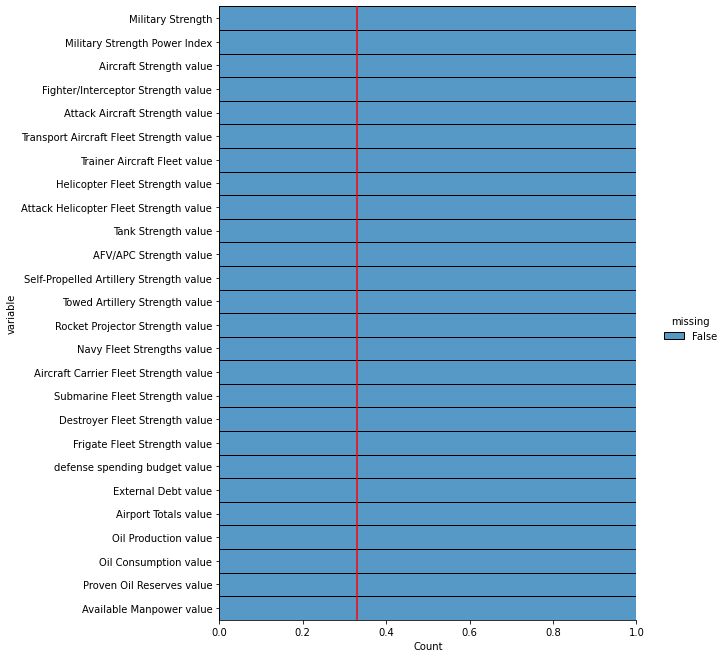

In [166]:
plt.figure(figsize=(4,6))

sns.displot(
    data=data.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.33, color="r");

In [148]:
data.loc[data['Military Strength'] == "Uzbekistan",['Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value']] = 0


In [164]:
data['Aircraft Carrier Fleet Strength value'].isnull().sum()

7

In [161]:
data.loc[data['Military Strength'] == "South Korea",['Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value']] = 10

In [167]:
data.isnull().sum()

Military Strength                          0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

## Fix the dtypes

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [136]:
data.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength value', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastli

In [138]:
data.drop(['Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       'Total Waterway Coverage value', 'Total Border Coverage value'], axis = 1,inplace= True)

In [139]:
data.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value
0,Afghanistan,1.3444000000,260.0000000000,0.0000000000,25.0000000000,30.0000000000,0.0000000000,187.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,"12,00,00,00,000","2,84,00,00,000",43.0000000000,0.0000000000,"5,500.0000000000",0.0000000000,"1,43,25,743"
1,Albania,2.3137000000,19.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,19.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,"25,00,00,000","9,50,50,00,000",4.0000000000,"16,000.0000000000","42,500.0000000000","16,83,00,000","15,19,438"
2,Algeria,0.4659000000,551.0000000000,103.0000000000,22.0000000000,59.0000000000,87.0000000000,257.0000000000,45.0000000000,880.0000000000,...,6.0000000000,0.0000000000,5.0000000000,"13,00,00,00,000","6,26,00,00,000",157.0000000000,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263"
3,Angola,0.8379000000,295.0000000000,72.0000000000,18.0000000000,30.0000000000,47.0000000000,126.0000000000,15.0000000000,379.0000000000,...,0.0000000000,0.0000000000,0.0000000000,"7,00,00,00,000","42,08,00,00,000",176.0000000000,"16,66,000","82,300.0000000000","8,27,30,00,000","62,44,205"
4,Argentina,0.6521000000,227.0000000000,24.0000000000,7.0000000000,9.0000000000,64.0000000000,100.0000000000,0.0000000000,370.0000000000,...,2.0000000000,4.0000000000,0.0000000000,"4,20,00,00,000","2,14,90,00,00,000","1,138.0000000000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430"


## Visualy inspect the some features

In [ ]:
data

## Decriptive statistics

# Data Preprocessing

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

### Model Building and label visualisation

### Evaluate 

## Hierarchical Clustering

### Dendogram

### Model Building and label visualisation

### Evaluate 